# Graphs depicting the blacklisting frequency of a liar infiltrating multiple clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
distance = 100000
nbClusters = 3
nbNodesRange = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
withSuspects = True


filename = "cluster_infiltration_N_" + str(nbNodesRange[0]) + "_to_" +\
    str(nbNodesRange[len(nbNodesRange)-1]) + "_with_" + str(nbClusters) + "_clusters"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,c3,liar_caught
3702,12,2,2,8,False
3703,12,2,8,2,False
3744,12,1,3,8,False
3745,12,3,8,1,False
4368,12,1,2,9,False
4369,12,2,9,1,False
4370,12,9,1,2,False
4854,12,1,1,10,False
4855,12,1,10,1,False
4856,12,10,1,1,False


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,11,10,20
1,12,10,24
2,13,17,25
3,14,20,28
4,15,16,39
5,16,25,38
6,17,26,46
7,18,24,55
8,19,34,56
9,20,36,63


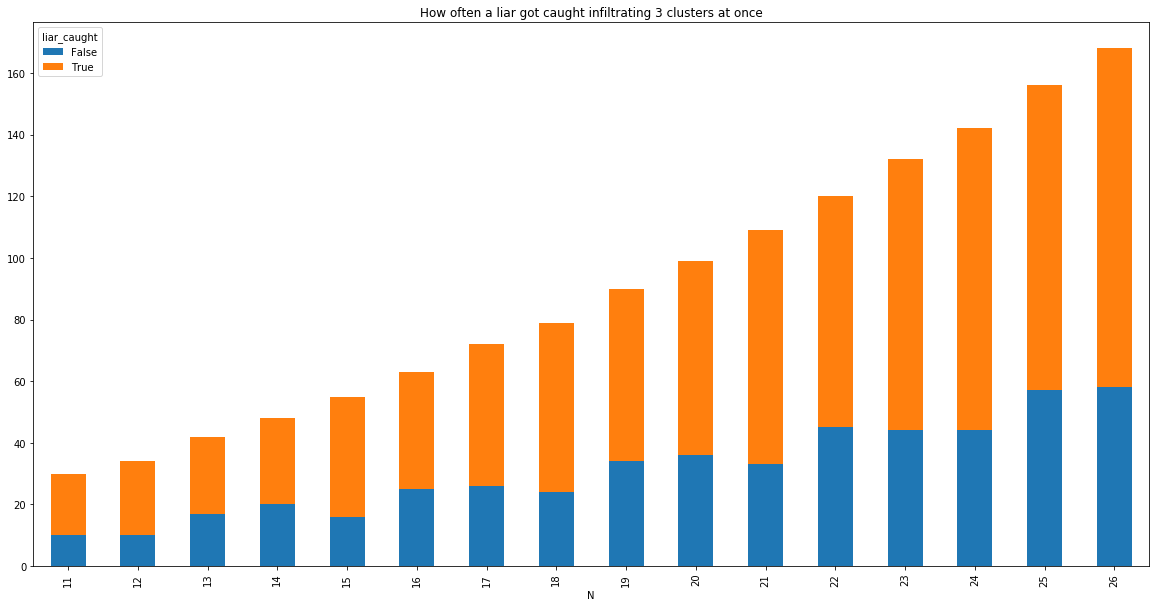

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", title="How often a liar got caught infiltrating "+\
              str(nbClusters)+" clusters at once")

In [7]:
fig.savefig('graphs/blacklisting_percentages/'+filename+'.png')

In [8]:
if nbClusters == 2:
    data["imbalance"] = (data["c1"]/data["c2"]).round(3)
    fig1, ax1 = plt.subplots(figsize=(50, 15))
    data[["imbalance", "liar_caught"]].drop_duplicates()\
        .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
        .plot.bar(stacked=True, ax=ax1, x="imbalance", rot=90,
                  title="Node imbalance between "+str(nbClusters)+" clusters")
    fig1.savefig('graphs/cluster_ratios/'+filename+'_cluster_ratio.png')